In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Many-Shocks Bartik IV with Energy and Import Exposure**

We construct a Bartik-style instrument that averages a country’s exposure to two types of price shocks: **energy** and **import** prices. Each component contributes equally (weight of ½).

#### **1. Bartik IV Definition**

Let:

- \( s^{\text{energy}}_{ik} \): share of energy product \( k \) in country \( i \)’s energy consumption  
- \( s^{\text{import}}_{ij} \): share of imported product \( j \) in country \( i \)’s total imports  
- \( p^{\text{energy}}_k \): price shock to energy product \( k \)  
- \( p^{\text{import}}_j \): price shock to import product \( j \)

Then the Bartik instrument for country \( i \) is:

$$
\text{Bartik}_i = \frac{1}{2} \sum_k s^{\text{energy}}_{ik} \cdot p^{\text{energy}}_k + \frac{1}{2} \sum_j s^{\text{import}}_{ij} \cdot p^{\text{import}}_j
$$

---

#### **2. Share Matrix Formulation**

We can express this as a weighted sum over a combined product index \( \ell \), where \( \ell \) indexes both energy and import products:

$$
S_{i\ell} =
\begin{cases}
\frac{1}{2} s^{\text{energy}}_{ik} & \text{if } \ell \text{ corresponds to energy product } k \\\\
\frac{1}{2} s^{\text{import}}_{ij} & \text{if } \ell \text{ corresponds to import product } j
\end{cases}
$$

So the overall instrument becomes:

$$
\text{Bartik}_i = \sum_\ell S_{i\ell} \cdot p_\ell
$$

where:

- \( S \) is the **exposure matrix** (countries \( i \) × products \( \ell \))  
- \( p_\ell \) are the **exogenous shocks** (e.g., world price changes)



In [2]:
# Combine both series into a single normalized vector (they already sum to 1 each)
# So we'll concatenate and then renormalize

europe_or_nearby = ['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom']

# Energy shares
energy_shares = pd.Series({
    "oil_consumption": 0.381066,
    "gas_consumption": 0.225697,
    "coal_consumption": 0.174941,
    "hydro_consumption": 0.088659,
    "nuclear_consumption": 0.055092,
    "wind_consumption": 0.030536,
    "other_renewable_consumption": 0.024421,
    "solar_consumption": 0.010104,
    "biofuel_consumption": 0.009483
})

# Import shares
import_shares = pd.Series({
    271111: 0.094092,
    7601: 0.092204,
    4407: 0.082425,
    7108: 0.054488,
    2601: 0.048609,
    2701: 0.043858,
    1005: 0.039965,
    207: 0.037953,
    9012100: 0.034764,
    201: 0.033852,
    7403: 0.031546,
    4403: 0.031135,
    1001: 0.029407,
    803: 0.022129,
    4412: 0.020991,
    7110: 0.019684,
    9011100: 0.019216,
    1701: 0.019139,
    4001: 0.019035,
    306: 0.018706,
    310210: 0.018639,
    1511: 0.017552,
    1514: 0.015926,
    1201: 0.014924,
    2401: 0.013165,
    7901: 0.012966,
    1003: 0.010945,
    1006: 0.009979,
    7502: 0.009678,
    7801: 0.008848,
    80510: 0.008179,
    180100: 0.007975,
    15121990: 0.007719,
    1507: 0.007219,
    7106: 0.006549,
    310420: 0.005935,
    204: 0.005663,
    2510: 0.005381,
    310530: 0.004884,
    8001: 0.004392,
    23012000: 0.003022,
    12024200: 0.002881,
    5201: 0.001170,
    9024000: 0.001112,
    15131999: 0.001043,
    9021000: 0.000896,
    1007: 0.000161
})

# Combine and normalize
combined_shares = pd.concat([energy_shares, import_shares])
combined_shares /= combined_shares.sum()

# Compute Herfindahl index
herfindahl_index = (combined_shares ** 2).sum()

# Compute effective number of shocks
effective_shocks = 1 / herfindahl_index

print(
    f"Herfindahl index: {herfindahl_index:.2f}\n"
    f"Effective number of shocks: {effective_shocks:.0f}"
)

Herfindahl index: 0.07
Effective number of shocks: 14


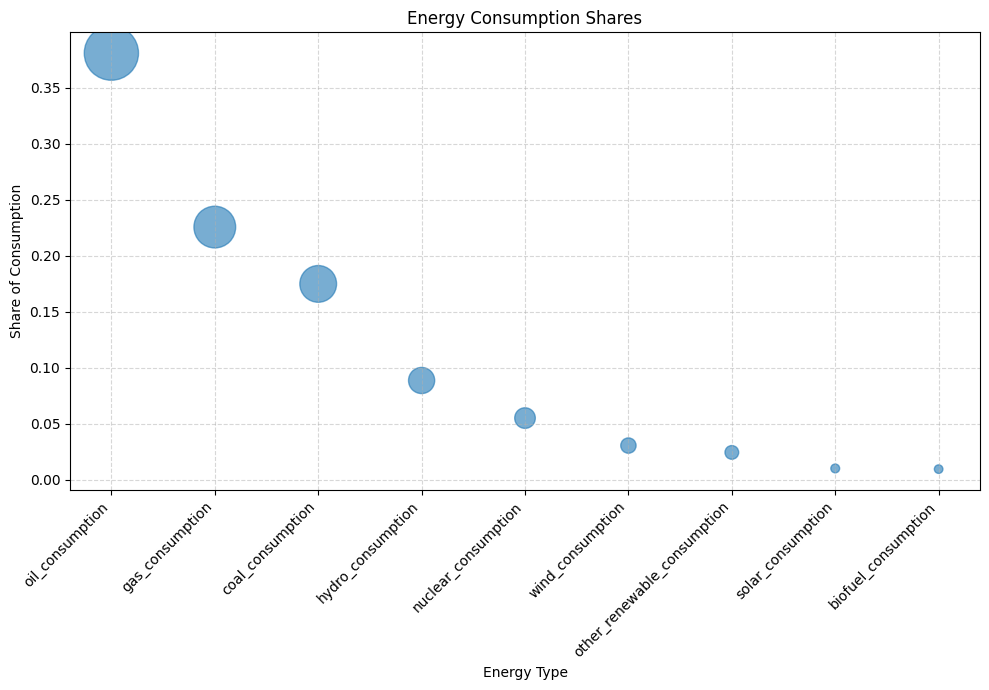

In [3]:
# Sort for plotting
energy_shares = energy_shares.sort_values(ascending=False)

# Create a bubble chart
plt.figure(figsize=(10, 7))
plt.scatter(x=range(len(energy_shares)), y=energy_shares.values, s=energy_shares.values * 4000, alpha=0.6)
plt.xticks(range(len(energy_shares)), energy_shares.index, rotation=45, ha='right')
plt.xlabel("Energy Type")
plt.ylabel("Share of Consumption")
plt.title("Energy Consumption Shares")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

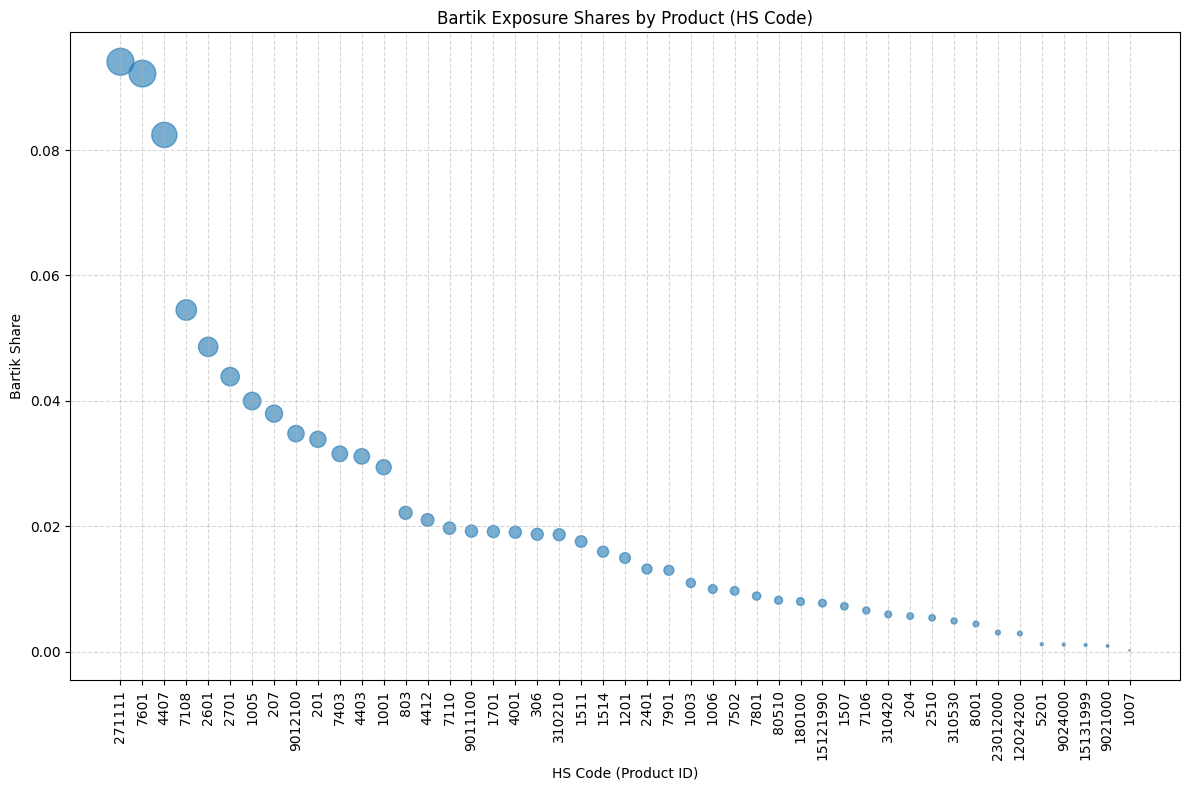

In [4]:
# Sort and prepare for plotting
bartik_shares = import_shares.sort_values(ascending=False)

# Create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x=range(len(bartik_shares)), y=bartik_shares.values, s=bartik_shares.values * 4000, alpha=0.6)
plt.xticks(range(len(bartik_shares)), bartik_shares.index.astype(str), rotation=90)
plt.xlabel("HS Code (Product ID)")
plt.ylabel("Bartik Share")
plt.title("Bartik Exposure Shares by Product (HS Code)")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
bartik_energy = pd.read_csv('../Design/data/bartik_iv.csv')
bartik_imports = pd.read_csv('data/bartik_iv.csv')

In [6]:
# sum bartik energy and imports
bartik = bartik_energy.merge(bartik_imports, on='country', how='outer').replace(np.nan, 0)

In [8]:
bartik['final'] = bartik['bartik_iv_x'] * 100 + bartik['bartik_iv_y']
bartik = bartik[['country','final']].rename(columns={'final': 'bartik_iv'})

In [ ]:
# bartik.to_csv('data/FINAL_BARTIK.csv', index=False)

# TESTS

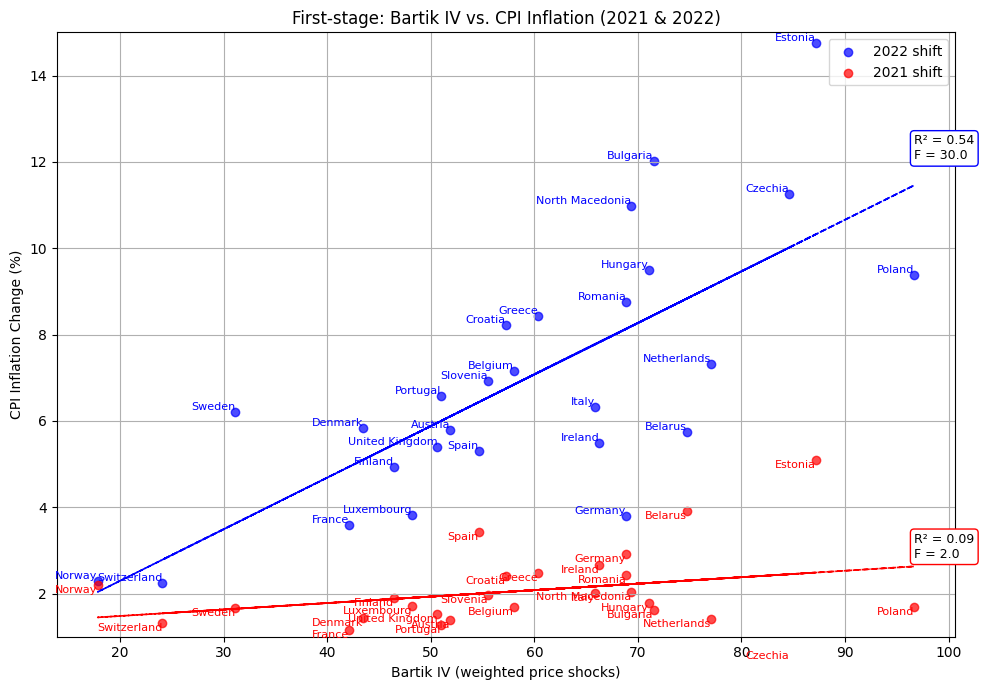

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load inflation data
wb = pd.read_csv('../Design/data/world_inflation.csv', skiprows=4)

# Define function for inflation change and regression
def compute_inflation_shift(year1, year2, color, label, y_offset):
    wb_diff = wb[['Country Name', year1, year2]].rename(
        columns={year1: f'inflation_{year1}', year2: f'inflation_{year2}'}
    )
    wb_diff = wb_diff.dropna()
    wb_diff[f'inflation_{year1}'] = pd.to_numeric(wb_diff[f'inflation_{year1}'], errors='coerce')
    wb_diff[f'inflation_{year2}'] = pd.to_numeric(wb_diff[f'inflation_{year2}'], errors='coerce')
    wb_diff['inflation_change'] = wb_diff[f'inflation_{year2}'] - wb_diff[f'inflation_{year1}']

    merged = bartik.merge(wb_diff[['Country Name', 'inflation_change']],
                          left_on='country', right_on='Country Name', how='left')
    merged = merged[merged['country'].isin(europe_or_nearby)]
    merged = merged.dropna(subset=['inflation_change'])
    merged = merged[merged['inflation_change'].abs() <= 30]

    x = merged['bartik_iv'].values
    y = merged['inflation_change'].values
    names = merged['country'].values

    # Plot points
    plt.scatter(x, y, alpha=0.7, label=label, color=color)

    # OLS with statsmodels
    X_ols = sm.add_constant(x)
    model = sm.OLS(y, X_ols).fit()
    y_pred = model.predict(X_ols)

    # Plot regression line
    plt.plot(x, y_pred, linestyle='--', linewidth=1.2, color=color)

    # Add stats box
    r2 = model.rsquared
    fstat = round(model.fvalue)
    textstr = f'R² = {r2:.2f}\nF = {fstat:.1f}'
    plt.text(max(x), max(y_pred) + y_offset, textstr,
             fontsize=9, bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

    return x, y, names

# Start plot
plt.figure(figsize=(10, 7))

# 2022 in blue
x_2022, y_2022, names_2022 = compute_inflation_shift('2021', '2022', 'blue', '2022 shift', y_offset=0.6)

# 2021 in red
x_2021, y_2021, names_2021 = compute_inflation_shift('2020', '2021', 'red', '2021 shift', y_offset=0.2)

# Annotate points
for i, name in enumerate(names_2022):
    plt.text(x_2022[i], y_2022[i], name, fontsize=8, ha='right', va='bottom', color='blue')

for i, name in enumerate(names_2021):
    plt.text(x_2021[i], y_2021[i], name, fontsize=8, ha='right', va='top', color='red')

plt.title("First-stage: Bartik IV vs. CPI Inflation (2021 & 2022)")
plt.xlabel("Bartik IV (weighted price shocks)")
plt.ylabel("CPI Inflation Change (%)")
plt.ylim(1, 15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Second stage regression

In [26]:
x_2022, names_2022

(array([51.86192626, 74.74715017, 58.0034951 , 71.52303751, 57.21981211,
        84.61507297, 43.48831451, 87.16055867, 46.47112747, 42.07709384,
        68.83700705, 60.38726004, 71.06454236, 66.28878683, 65.85705415,
        48.22993934, 77.06855955, 69.35035742, 17.83352065, 96.67510419,
        50.9756573 , 68.88287113, 55.53162885, 54.63697553, 31.12390649,
        24.08260559, 50.63425857]),
 array(['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
        'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
        'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
        'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
       dtype=object))

In [74]:
approvals = pd.read_csv('../Design/data/Approvals_cleaned.csv')

In [75]:
approvals.drop(columns=['Sweden', 'Italy'], inplace=True)

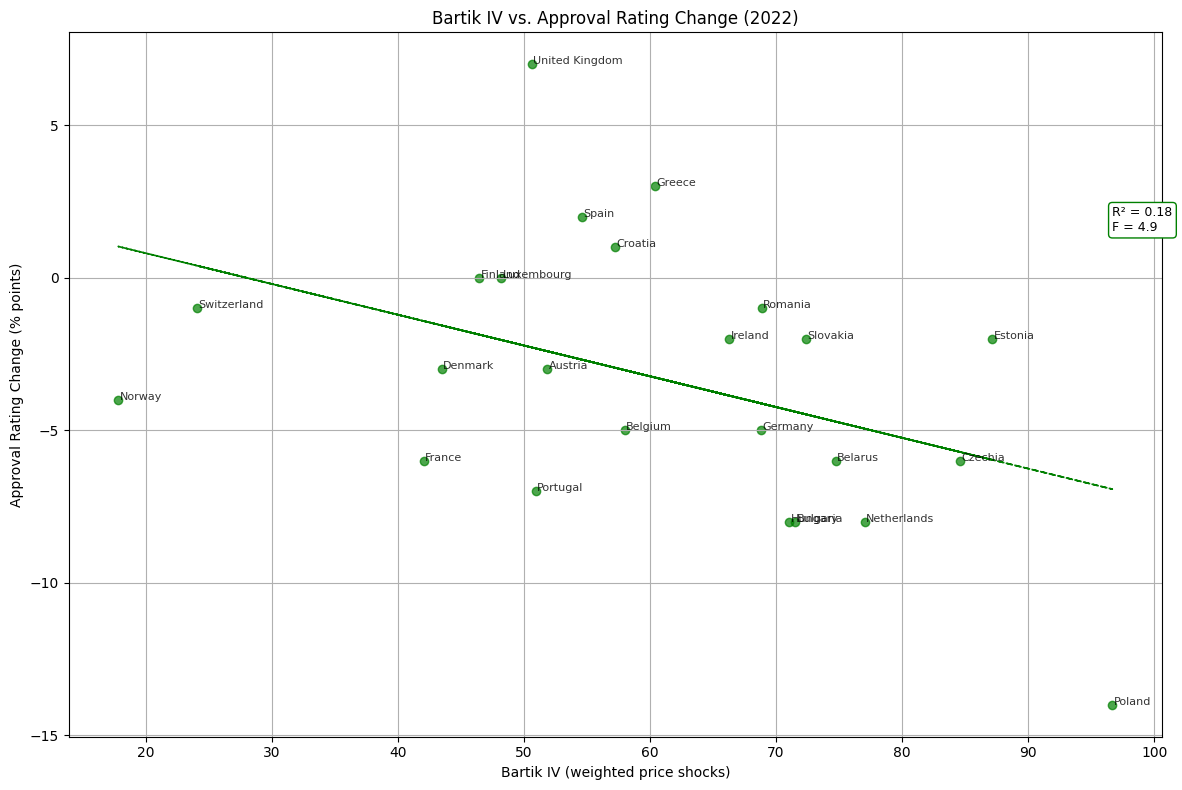

In [80]:
# for each country return change in approval rating from 2022-01-01 to 2022-05-01

def compute_approval_change(start_date, end_date):
    df = approvals.copy()
    df['Date'] = pd.to_datetime(df['Date'])  # ensure datetime format

    # Convert wide to long format
    df_long = df.melt(id_vars='Date', var_name='country', value_name='approval')

    # Filter date range
    df_long = df_long[(df_long['Date'] >= start_date) & (df_long['Date'] <= end_date)]

    # Calculate change from start to end per country
    start_approvals = df_long[df_long['Date'] == pd.to_datetime(start_date)]
    end_approvals = df_long[df_long['Date'] == pd.to_datetime(end_date)]

    merged = pd.merge(start_approvals, end_approvals, on='country', suffixes=('_start', '_end'))
    merged['approval_change'] = merged['approval_end'] - merged['approval_start']

    return merged[['country', 'approval_change']]

approval_change = compute_approval_change('2022-06-01', '2022-12-01')

# Start plot
plt.figure(figsize=(12, 8))

# Merge with Bartik data
merged = bartik.merge(approval_change, on='country', how='left')
merged = merged[merged['country'].isin(europe_or_nearby)]
merged = merged.dropna(subset=['approval_change'])

# Plot points
plt.scatter(merged['bartik_iv'], merged['approval_change'], alpha=0.7, color='green')

# Add country name labels to each point
for _, row in merged.iterrows():
    plt.text(row['bartik_iv'] + 0.1, row['approval_change'], row['country'], fontsize=8, alpha=0.8)

# OLS regression
X_ols = sm.add_constant(merged['bartik_iv'])
model = sm.OLS(merged['approval_change'], X_ols).fit()
y_pred = model.predict(X_ols)

# Plot regression line
plt.plot(merged['bartik_iv'], y_pred, linestyle='--', linewidth=1.2, color='green')

# Add stats box
r2 = model.rsquared
fstat = model.fvalue
textstr = f'R² = {r2:.2f}\nF = {fstat:.1f}'
plt.text(max(merged['bartik_iv']), max(y_pred) + 0.5, textstr,
         fontsize=9, bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'))

# Labels and formatting
plt.title("Bartik IV vs. Approval Rating Change (2022)")
plt.xlabel("Bartik IV (weighted price shocks)")
plt.ylabel("Approval Rating Change (% points)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
# regression for Bartik IV and approval change
X = sm.add_constant(merged['bartik_iv'])
model = sm.OLS(merged['approval_change'], X).fit()
print(model.summary())
# Print the regression summary

                            OLS Regression Results                            
Dep. Variable:        approval_change   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.878
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0379
Time:                        15:16:20   Log-Likelihood:                -66.892
No. Observations:                  24   AIC:                             137.8
Df Residuals:                      22   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8281      2.877      0.983      0.3